# 33 Machine Learning Project

Your First Machine Learning Project in R Step-By-Step by Jason Brownlee 
https://machinelearningmastery.com/machine-learning-in-r-step-by-step

install.packages("caret")

[1] 120   5

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"     "factor"

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


[1] "setosa"     "versicolor" "virginica"

,freq,percentage
setosa,40,33.33333
versicolor,40,33.33333
virginica,40,33.33333


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width         Species  
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.10   setosa    :40  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.575   1st Qu.:0.30   versicolor:40  
 Median :5.800   Median :3.000   Median :4.350   Median :1.30   virginica :40  
 Mean   :5.857   Mean   :3.049   Mean   :3.760   Mean   :1.19                  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.80                  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.50                  

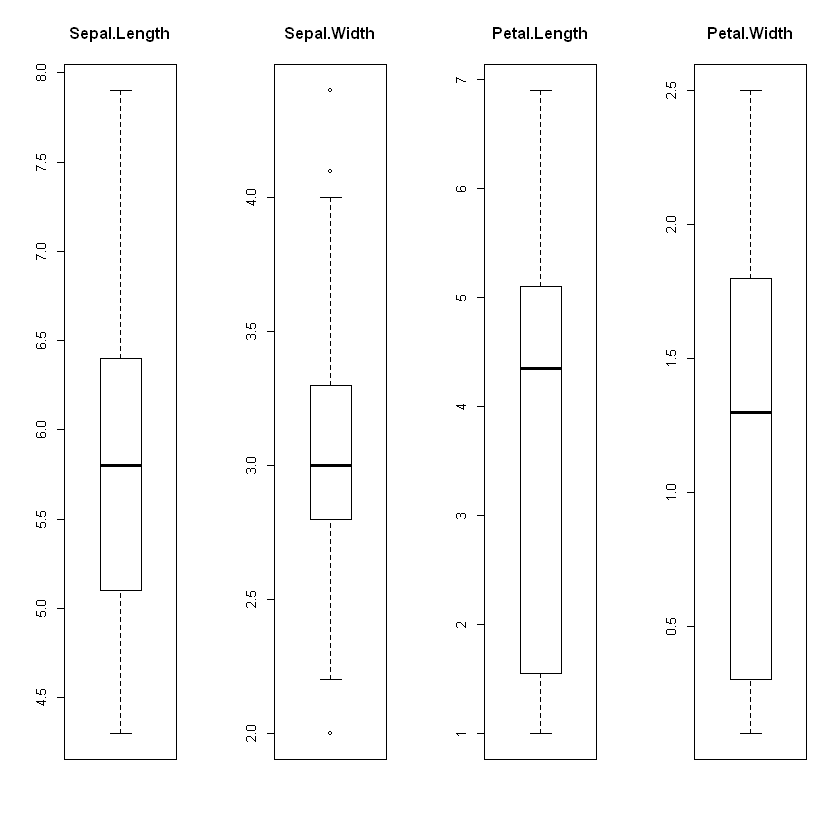

In [16]:
library(caret) # The caret package provides hundreds of machine learning algorithms

# attach iris dataset to environment
data(iris)

# rename dataset
dataset <- iris

# 80% data goes to training
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)

# 80% for training and testing model
dataset <- dataset[validation_index,]

# 20% validation subset
validation <- dataset[-validation_index,]

dim(dataset)
sapply(dataset, class)
head(dataset) 
levels(dataset$Species)

# summarize class distribution
percentage <- prop.table(table(dataset$Species)) * 100
cbind(freq=table(dataset$Species), percentage=percentage)

summary(dataset)

# split input and output
x <- dataset[,1:4]
y <- dataset[,5]

# boxplot for each attribute on one image
par(mfrow=c(1,4))
  for(i in 1:4) {
  boxplot(x[,i], main=names(iris)[i])
}

# barplot for class breakdown
plot(y)

# scatterplot matrix
featurePlot(x=x, y=y, plot="ellipse")

# density plots for each attribute by class value
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

# Run algorithms using 10-fold cross validation
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

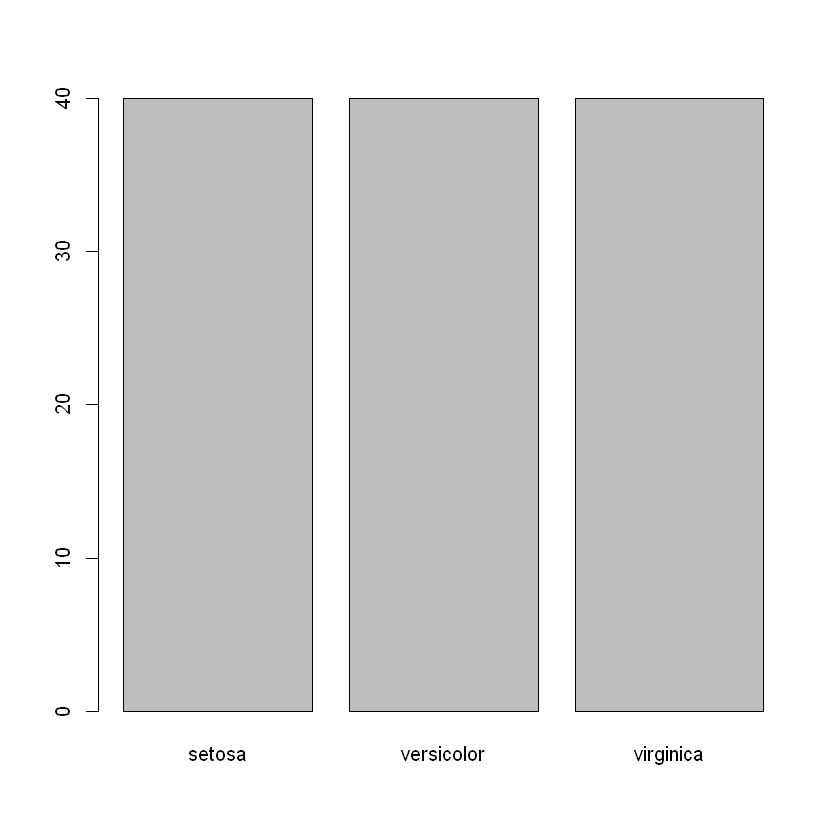

In [5]:
# barplot for class breakdown
plot(y)

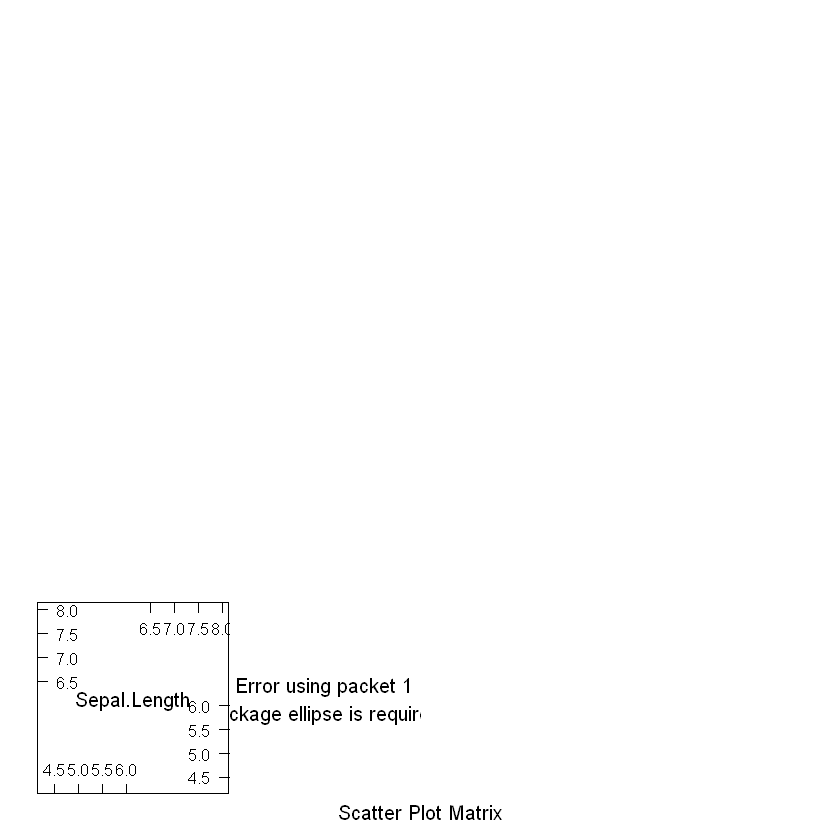

In [6]:
# scatterplot matrix ??????????????????????????
#featurePlot(x=x, y=y, plot="ellipse")

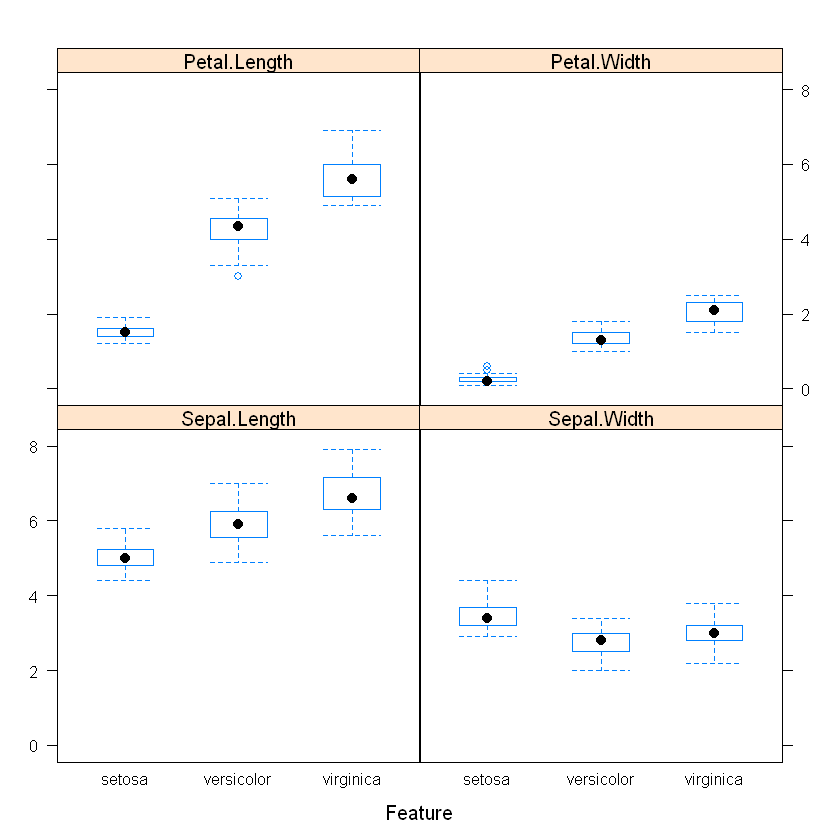

In [7]:
# box and whisker plots for each attribute
featurePlot(x=x, y=y, plot="box")

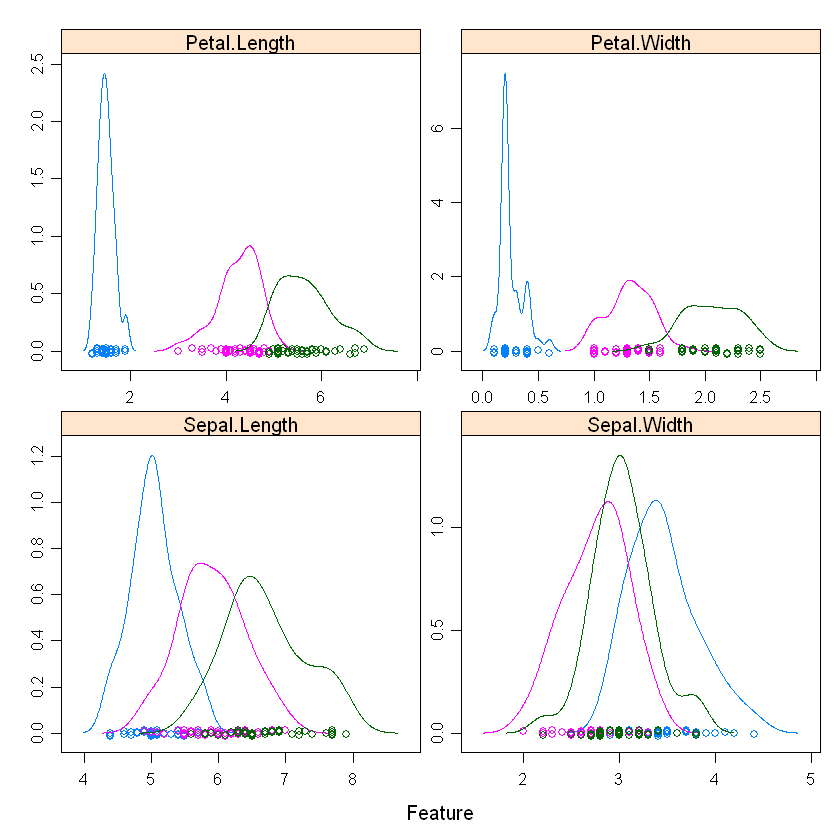

In [8]:
# density plots for each attribute by class value
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

In [10]:
# Run algorithms using 10-fold cross validation
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

In [11]:
# a) linear algorithms
set.seed(7)
fit.lda <- train(Species~., data=dataset, method="lda", metric=metric, trControl=control)
# b) nonlinear algorithms
# CART
set.seed(7)
fit.cart <- train(Species~., data=dataset, method="rpart", metric=metric, trControl=control)
# kNN
set.seed(7)
fit.knn <- train(Species~., data=dataset, method="knn", metric=metric, trControl=control)
# c) advanced algorithms
# SVM
set.seed(7)
fit.svm <- train(Species~., data=dataset, method="svmRadial", metric=metric, trControl=control)
# Random Forest
set.seed(7)
fit.rf <- train(Species~., data=dataset, method="rf", metric=metric, trControl=control)

ERROR: Error: package e1071 is required


In [12]:
# summarize accuracy of models
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)

ERROR: Error in resamples(list(lda = fit.lda, cart = fit.cart, knn = fit.knn, : object 'fit.lda' not found


In [13]:
# compare accuracy of models
dotplot(results)

ERROR: Error in dotplot(results): object 'results' not found


In [14]:
# summarize Best Model
print(fit.lda)

ERROR: Error in print(fit.lda): object 'fit.lda' not found


In [15]:
# estimate skill of LDA on the validation dataset
predictions <- predict(fit.lda, validation)
confusionMatrix(predictions, validation$Species)

ERROR: Error in predict(fit.lda, validation): object 'fit.lda' not found
